In [2]:
#plt is for plotting
import matplotlib.pyplot as plt
#go is more complicated but can make more complicated figures.
#import plotly.graph_objects as go
#np is for manipulating data
import numpy as np 
#os is for controlling windows explorer mainly
import os
#pd & loadmat are for importaing data
import pandas as pd
#scipy has a lot of user-created content for additional functionalities
import math
from scipy import integrate as intg
from scipy import signal #for smoothing
from scipy.io import loadmat #for loading .mat files
#more info on loadmat is here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.loadmat.html
import re
#Making HDF5 files!!
import h5py
#Hey Danny

In [11]:
#Separate the entire file into an array that has comma separated values.
#Tiny comment
directory='C:/users/jadse/Github/MauzerollServer/ASC2HDF5Export/'
os.chdir(directory)
file='10umscratchtestafterxpsnotebooktest2.asc'

with open(file, 'r') as f:
    data=[]
    for i in f.readlines():
        data.append(i.split(','))

In [12]:
#This gives the position of the start of all the columns.

columnPosition=[]
columnPosition.append(0)
for i in range(len(data)):
    #Do I need to add another 'if' statement for if the length of the string in data[i] is 1 long? Does indexing a string that is one long default to just a list and not a list of lists?
    if repr(data[i][0]) == repr('\n'):
        #print(repr(data[i][0]))
        columnPosition.append(i)
print(columnPosition)

[0, 97, 100, 2404, 2407, 2504, 2507, 4811, 4814, 4912, 4915, 7219, 7222, 7319, 7322, 9626, 9629, 9727, 9730, 12034, 12037, 12134, 12137, 14441, 14444, 14542, 14545, 16849, 16852, 16950, 16953, 19257, 19260, 19358, 19361, 21665, 21668, 21765, 21768, 24072, 24075, 24173, 24176, 26480, 26483, 26580, 26583, 28887, 28890, 28987, 28990, 31294, 31297, 31395, 31398, 33702, 33705, 33802, 33805, 36109, 36112, 36209, 36212, 38516, 38519, 38617, 38620, 40924, 40927, 41025, 41028, 43332, 43335, 43433, 43436, 45740, 45743, 45840, 45843, 48147, 48150, 48248, 48251, 50555, 50558, 50656, 50659, 52963, 52966, 53064, 53067, 55371, 55374, 55472, 55475, 57779, 57782, 57880, 57883, 60187, 60190, 60288, 60291, 62595, 62598, 62696, 62699, 65003, 65006, 65104, 65107, 67411, 67414, 67512, 67515, 69819, 69822, 69920, 69923, 72227, 72230, 72328, 72331, 74635, 74638, 74736, 74739, 77043, 77046, 77143, 77146, 79450, 79453, 79550, 79553, 81857, 81860, 81957, 81960, 84264, 84267, 84364, 84367, 86671, 86674, 86772, 86

In [13]:
#This places all the identified positions into a list of lists called stringArrays

stringArrays=[0]*len(columnPosition)
increment=columnPosition[0]+1
flag=[0]*len(columnPosition)

for i in range(len(columnPosition)-1):
    stringArrays[i]=[0]*(columnPosition[i+1]-columnPosition[i])
    for ii in range(columnPosition[i+1]-columnPosition[i]):
        stringArrays[i][ii]=data[increment]
        increment+=1
        
    
    #This gets rid of an unwanted '\n' in the last column.
    stringArrays[i].pop()
        
    #This lets us know if an information column follows the dataset. This could mean that this is a specific type of scan that we can quickly identify the type of scan with.
    if(len(stringArrays[i]) < 20):
        flag[i]=0
        
        #Convert the string into floats. The 3 in range skips over the headings and leaves them as weird strings.
        for iii in range(1,len(stringArrays[i])-1,1):
            increment2=0
            for iiii in stringArrays[i][iii]:
                stringArrays[i][iii][increment2] = float(iiii)
                increment2+=1
                
    elif(flag[i-1]==0):
        flag[i]=2
        
        #Convert the string into floats. The 3 in range skips over the headings and leaves them as weird strings.
        for iii in range(3,len(stringArrays[i]),1):
            increment2=0
            for iiii in stringArrays[i][iii]:
                stringArrays[i][iii][increment2] = float(iiii)
                increment2+=1
    
    else:
        flag[i]=1
        
        #Convert the string into floats. The 3 in range skips over the headings and leaves them as weird strings.
        for iii in range(3,len(stringArrays[i]),1):
            increment2=0
            for iiii in stringArrays[i][iii]:
                stringArrays[i][iii][increment2] = float(iiii)
                increment2+=1
                
print(flag)  

[2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 

In [14]:
#Export an HDF5 file with the information stored in stringArrays

os.chdir(directory)

def getColumn(listofLists,column):
    return[item[column] for item in listofLists[3:]]
def getColumn2(listofLists,column):
    return[item[column] for item in listofLists[1:]]
def getScanString(stringNumber):
    return list(f[user][date].keys())[stringNumber]
def getColumnData(stringNumber,columnNumber):
    return list(f[user][date][getScanString(stringNumber)].keys())[columnNumber]



user='lindsay'
date='20230713'
dataPosIncrement=1000000

with h5py.File('testExport.hdf5','w') as f:
    
    #This is how you can assign user
    metaData = f.create_group(user+'/'+date)
    metaData.attrs['InstrumentName'] = 'ELP3'
    metaData.attrs['MapDimensions'] = '5x5'
    metaData.attrs['IsDannyCool'] = 'Yes'
    
    #This is for the metadata from the notebook file.
    for i in range(len(stringArrays)-1):
        
        if(flag[i]==2): #This means this is the first scan of a series. This means we must skip the first line and go to the second.
            #print('h')
            ii=0
            rowNumber=1
            iiiiii=0 #This is used for column names to make sure they always increment up.
            groupName=stringArrays[i][1][0] #Here is where we skip the first line and go to the second line.
            data = metaData.create_group('Data'+str(dataPosIncrement))
            dataPosIncrement+=1
            data.attrs['ScanCycleLength'] = rowNumber
            data.attrs['OriginalScanName'] = groupName
            for ii in range(len(stringArrays[i][2])): #Should stringArrays[i][#] be a 1 or a 2? 2 worked and 1 didn't?
                data.create_dataset('Sweep'+str(rowNumber)+'Column'+str(iiiiii),data=getColumn(stringArrays[i],ii))
                iiiiii+=1 #This is used for column names to make sure they always increment up.
        
        elif(flag[i]==1):
            rowNumber+=1
            iiiiii=0 #This is used for column names to make sure they always increment up.
            ii=0
            data.attrs['ScanCycleLength'] = rowNumber
            while ii < len(stringArrays[i][0]):
                data.create_dataset('Sweep'+str(rowNumber)+'Column'+str(iiiiii),data=getColumn(stringArrays[i],ii))
                iiiiii+=1 #This is used for column names to make sure they always increment up.
                ii+=1
                
        elif(flag[i]==0):
            
            #This will determine the type of scan and probably needs A LOT OF ATTENTION. We could do slightly different analysis methods, like X is first in CVs, Y is first in PDPs, and Z is first in OCPs. This is probably be the easiest to do code-wise, but then the code is dependent on the beginning of the metadata export never changing.
            if('2+2'=='4'): #CV
                data.attrs['ScanType']='CV'
            elif(stringArrays[i][0][1]=='    OCP[V]'): #OCP
                data.attrs['ScanType']='OCP'
            else: #PDP
                data.attrs['ScanType']='PDP'
                
            #This puts the metadata as attributes for the group that was created    
            for iii in range(len(stringArrays[i][:])):
                
                if stringArrays[i][-1][0][0:32]=='Cannot replay while replaying...': #This happens when the scan is selected during the scan. I haven't tried this with CVs, but it probably breaks here if this happens with a CV.
                    for ii in range(len(stringArrays[i][0])):
                        data.attrs['HEKASucks'+str(iii)] = stringArrays[i][0][ii] #'HEKASucks' should be changed to something else but it'll be difficult to do this nicely. Maybe grab the next flag=0's  strings? But this doesn't work for a map that has all the same type of scans/different scans alternating/etc......
                        
                else:
                    for ii in range(len(stringArrays[i][0])):
                        string=stringArrays[i][0][ii]
                        #f[user][date][stringArrays[i-1][0][0]]['Column0'].attrs[string] = stringArrays[i][1][ii]
                        data.attrs[string+str(iii)] = stringArrays[i][1][ii]
            

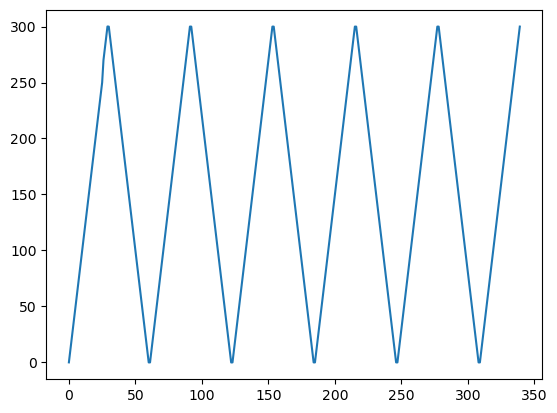

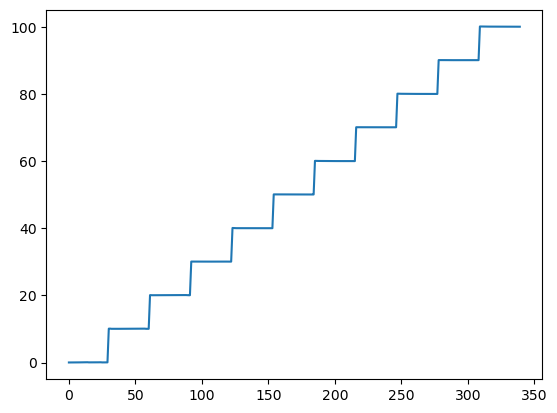

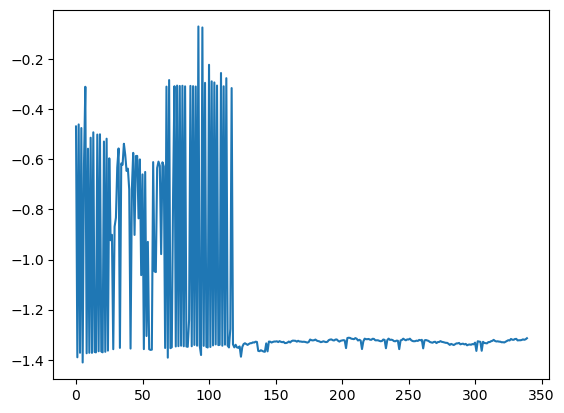

In [74]:
#This gets the X,Y,Z co-ordinates from the above HDF5 file export.

filename='testexport.hdf5'
with h5py.File(filename,'a') as f:

    giveMeXCoords=[]
    giveMeYCoords=[]
    giveMeZCoords=[]
    giveMeOCP=[]
    #check=[]
    
    for i in (list(f[user][date].keys())):
        #print(list(f[user][date][getScanString(23)].attrs.items())[position][0]) 
        flagX=0
        flagY=0
        flagZ=0
        flagOCP=0
        for ii in range(len(list(f[user][date][i].attrs.items()))):
            if(list(f[user][date][i].attrs.items())[ii][0].replace(" ","")[0:5]=='X-pos' and flagX==0): 
                flagX=1
                if (list(f[user][date][i].attrs.items())[ii][1].replace(" ",""))[-1] == 'n': 
                    giveMeXCoords.append(float(list(f[user][date][i].attrs.items())[ii][1].replace(" ","").replace('n',''))/1000)
                elif (list(f[user][date][i].attrs.items())[ii][1].replace(" ",""))[-1] == 'm':
                    giveMeXCoords.append(float(list(f[user][date][i].attrs.items())[ii][1].replace(" ","").replace('m',''))*1000)           
                elif (list(f[user][date][i].attrs.items())[ii][1].replace(" ",""))[-1] == 'µ':
                    giveMeXCoords.append(float(list(f[user][date][i].attrs.items())[ii][1].replace(" ","").replace('µ','')))
            if(list(f[user][date][i].attrs.items())[ii][0].replace(" ","")[0:5]=='Y-pos' and flagY==0):
                flagY=1
                if (list(f[user][date][i].attrs.items())[ii][1].replace(" ",""))[-1] == 'n': 
                    giveMeYCoords.append(float(list(f[user][date][i].attrs.items())[ii][1].replace(" ","").replace('n',''))/1000)
                elif (list(f[user][date][i].attrs.items())[ii][1].replace(" ",""))[-1] == 'm':  
                    giveMeYCoords.append(float(list(f[user][date][i].attrs.items())[ii][1].replace(" ","").replace('m',''))*1000)           
                elif (list(f[user][date][i].attrs.items())[ii][1].replace(" ",""))[-1] == 'µ':
                    giveMeYCoords.append(float(list(f[user][date][i].attrs.items())[ii][1].replace(" ","").replace('µ','')))
            if(list(f[user][date][i].attrs.items())[ii][0].replace(" ","")[0:5]=='Z-pos' and flagZ==0):
                flagZ=1
                if (list(f[user][date][i].attrs.items())[ii][1].replace(" ",""))[-1] == 'n': 
                    giveMeZCoords.append(float(list(f[user][date][i].attrs.items())[ii][1].replace(" ","").replace('n',''))/1000)
                elif (list(f[user][date][i].attrs.items())[ii][1].replace(" ",""))[-1] == 'm':
                    giveMeZCoords.append(float(list(f[user][date][i].attrs.items())[ii][1].replace(" ","").replace('m',''))*1000)           
                elif (list(f[user][date][i].attrs.items())[ii][1].replace(" ",""))[-1] == 'µ':
                    giveMeZCoords.append(float(list(f[user][date][i].attrs.items())[ii][1].replace(" ","").replace('µ','')))
            if(list(f[user][date][i].attrs.items())[ii][0].replace(" ","")[-7:-1]=='OCP[V]' and flagOCP==0):
                flagOCP=1
                #check.append(list(f[user][date][i].attrs.items())[ii][1])
                if (list(f[user][date][i].attrs.items())[ii][1].replace(" ",""))[-1] == 'n':
                    giveMeOCP.append(float(list(f[user][date][i].attrs.items())[ii][1].replace(" ","").replace('n',''))/1000000000)
                elif (list(f[user][date][i].attrs.items())[ii][1].replace(" ",""))[-1] == 'm':
                    giveMeOCP.append(float(list(f[user][date][i].attrs.items())[ii][1].replace(" ","").replace('m',''))/1000)
                elif (list(f[user][date][i].attrs.items())[ii][1].replace(" ",""))[-1] == 'µ':
                    giveMeOCP.append(float(list(f[user][date][i].attrs.items())[ii][1].replace(" ","").replace('µ',''))/1000000)
                else:
                    giveMeOCP.append(float(list(f[user][date][i].attrs.items())[ii][1].replace(" ","")))
                
    
    #Add them to the hdf5 export file!
    
    #position = f.create_group(user+'/'+date+'/position')
    #position.create_dataset('Xposition',data=giveMeXCoords[1::2])
    #position.create_dataset('Yposition',data=giveMeYCoords[1::2])
    #position.create_dataset('Zposition',data=giveMeZCoords[1::2])
    
#print(check)
plt.figure()
plt.plot(giveMeXCoords[1::2]) #This plots every other point. array[1::2]
plt.figure()
plt.plot(giveMeYCoords[1::2])
plt.figure()
plt.plot(giveMeOCP)

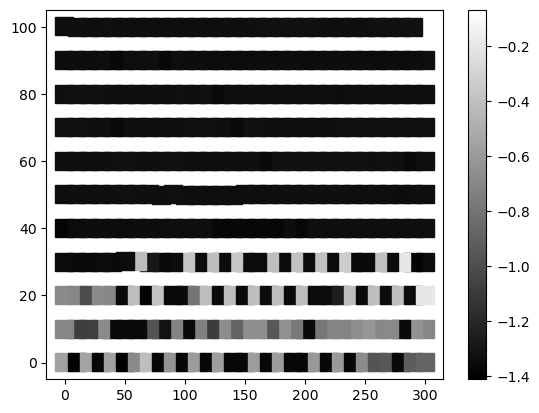

In [120]:
import matplotlib as mpl

fig =plt.figure()
ax = plt.axes()

giveMeOCP2=giveMeOCP+np.max(giveMeOCP) #Plus because this is all negative!!! Be careful of +/- sign.
giveMeOCP2=giveMeOCP2/abs(np.min(giveMeOCP2))
giveMeOCP2=giveMeOCP2+1
#print((giveMeOCP2))

for i in range(0,len(giveMeOCP),1):
    color=[giveMeOCP2[i],giveMeOCP2[i],giveMeOCP2[i]]
    ax.plot(giveMeXCoords[i*2],giveMeYCoords[i*2],markerfacecolor=color,markeredgecolor=color,markersize=13,marker='s')
    #print(color)
#ax.figure.colorbar()   
cmap = mpl.cm.gray
norm = mpl.colors.Normalize(vmin=np.min(giveMeOCP), vmax=np.max(giveMeOCP))
ax.figure.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap))